<a href="https://colab.research.google.com/github/ansh572/EDUNET-_AI-ML_PROJECT/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1 : Import Libraries and Load Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import LabelEncoder
from sklearn.metrics. pairwise import cosine_similarity
from sklearn. feature_extraction. text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
destinations_df = pd. read_csv("Expanded_Destinations.csv")
reviews_df = pd.read_csv("Final_Updated_Expanded_Reviews.csv")
userhistory_df = pd. read_csv("Final_Updated_Expanded_UserHistory.csv")
users_df = pd. read_csv("Final_Updated_Expanded_Users.csv")

In [ ]:
destinations_df.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [ ]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [ ]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [ ]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [ ]:
reviews_destinations = pd.merge(reviews_df, destinations_df, on='DestinationID', how='inner')
reviews_destinations_userhistory = pd.merge(reviews_destinations, userhistory_df, on='UserID', how='inner')
df = pd.merge(reviews_destinations_userhistory, users_df, on='UserID', how='inner')
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


**STEP 2 : Data Preprocessing**

In [ ]:
df.shape

(993, 20)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ReviewID,0
DestinationID_x,0
UserID,0
Rating,0
ReviewText,0
Name_x,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0


In [ ]:
df['features'] = df['Type'] + " " + df['State'] + " " + df['BestTimeToVisit'] + " " + df['Preferences']

In [ ]:
df['features']

,features
0,"City Rajasthan Oct-Mar City, Historical"
1,"Historical Uttar Pradesh Nov-Feb City, Historical"
2,"City Rajasthan Oct-Mar Nature, Adventure"
3,"Nature Kerala Sep-Mar Nature, Adventure"
4,"City Rajasthan Oct-Mar City, Historical"
...,...
988,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
989,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
990,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."
991,"Historical Uttar Pradesh Nov-Feb Beaches, Hist..."


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

destination_features = vectorizer.fit_transform(df['features'])

cosine_sim = cosine_similarity(destination_features, destination_features)

In [ ]:
cosine_sim

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]])

In [ ]:
cosine_sim

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]])

In [ ]:
def recommend_destinations (user_id, userhistory_df, destinations_df, cosine_sim):

  visited_destinations = userhistory_df[userhistory_df['UserID' ]==user_id]['DestinationID'].values

  similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)

  recommended_destinations_idx = np.argsort(similar_scores)[::-1]

  recommendations = []
  for idx in recommended_destinations_idx:
    if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
      recommendations.append(destinations_df.iloc[idx][['DestinationID', 'Name', 'Type', 'State','Popularity', 'BestTimeToVisit']].to_dict())
      if len(recommendations) >= 5:
        break


  return pd.DataFrame(recommendations)

recommended_destinations = recommend_destinations (20, userhistory_df, destinations_df, cosine_sim)

recommended_destinations

,DestinationID,Name,Type,State,Popularity,BestTimeToVisit
0,960,Leh Ladakh,Adventure,Jammu and Kashmir,8.925500,Apr-Jun
1,986,Taj Mahal,Historical,Uttar Pradesh,8.108715,Nov-Feb
2,162,Goa Beaches,Beach,Goa,7.544770,Nov-Mar
3,163,Jaipur City,City,Rajasthan,8.168781,Oct-Mar
4,15,Leh Ladakh,Adventure,Jammu and Kashmir,9.297389,Apr-Jun


In [ ]:
recommended_destinations = recommend_destinations(40, userhistory_df, destinations_df, cosine_sim)
recommended_destinations

,DestinationID,Name,Type,State,Popularity,BestTimeToVisit
0,992,Goa Beaches,Beach,Goa,8.114747,Nov-Mar
1,202,Goa Beaches,Beach,Goa,8.246719,Nov-Mar
2,201,Taj Mahal,Historical,Uttar Pradesh,7.653509,Nov-Feb
3,405,Leh Ladakh,Adventure,Jammu and Kashmir,8.266310,Apr-Jun
4,404,Kerala Backwaters,Nature,Kerala,9.289387,Sep-Mar


In [ ]:
user_item_matrix = userhistory_df.pivot(index='UserID', columns='DestinationID', values='ExperienceRating')
user_item_matrix.fillna(0, inplace=True)
user_similarity = cosine_similarity(user_item_matrix)

In [ ]:
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
  similar_users = user_similarity[user_id - 1]
  similar_users_idx = np.argsort(similar_users)[::-1][1:6]
  similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)
  recommended_destination_ids = similar_user_ratings.sort_values(ascending=False). head(5). index
  recommendations = destinations_df[destinations_df['DestinationID'].isin(recommended_destination_ids)][['DestinationID' , 'Name','State','Type','Popularity','BestTimeToVisit']]
  return recommendations

collaborative_recommendations = collaborative_recommend(15, user_similarity, user_item_matrix, destinations_df)

collaborative_recommendations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
435,436,Taj Mahal,Uttar Pradesh,Historical,7.728114,Nov-Feb
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun


In [ ]:
collaborative_recommendations = collaborative_recommend(100, user_similarity, user_item_matrix, destinations_df)
collaborative_recommendations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun


In [ ]:
collaborative_recommendations = collaborative_recommend(150, user_similarity, user_item_matrix, destinations_df)
collaborative_recommendations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
141,142,Goa Beaches,Goa,Beach,7.601039,Nov-Mar
280,281,Taj Mahal,Uttar Pradesh,Historical,9.430864,Nov-Feb
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
771,772,Goa Beaches,Goa,Beach,9.137327,Nov-Mar


In [ ]:
collaborative_recommendations = collaborative_recommend(50, user_similarity, user_item_matrix, destinations_df)
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
479,480,Leh Ladakh,Jammu and Kashmir,Adventure,9.183226,Apr-Jun
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun


In [ ]:
import pandas as pd
from sklearn. model_selection import train_test_split
from sklearn. ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

data = df.copy()

In [ ]:
features = ['Name_x','State','Type','BestTimeToVisit','Preferences','Gender','NumberOfAdults','NumberOfChildren']
target = 'Popularity'

In [ ]:
label_encoding ={}

for col in features:
  if data[col].dtype == 'object':
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoding[col] = le

In [ ]:
x = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))

MSE : 0.30215968785605185


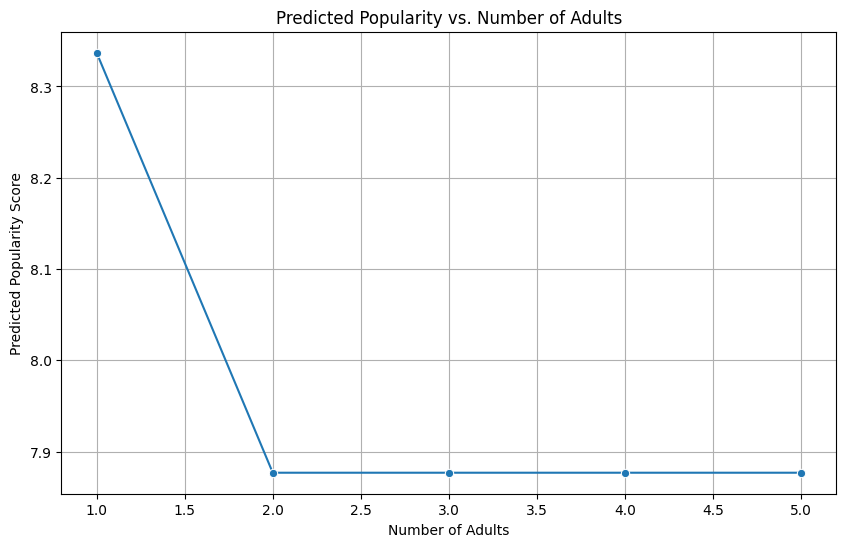

Predicted Popularity Score for 2 adults:  7.88


In [29]:
def recommend_destinations (user_input, model, label_encoding, features, data):
  encoded_input = {}
  for feature in features:
    if feature in label_encoding:
      encoded_input[feature] = label_encoding[feature].transform([user_input[feature]])[0]
    else:
      encoded_input [feature] = user_input [feature]

  input_df = pd.DataFrame([encoded_input])
  predicted_popularity = model.predict(input_df)[0]

  return predicted_popularity

user_input = {
    'Name_x': 'Jaipur City',
    'State': 'Rajasthan',
    'Type': 'City',
    'BestTimeToVisit': 'Oct-Mar',
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1
}

# Generate multiple predictions for line graph
num_adults_range = range(1, 6)  # From 1 to 5 adults
predicted_popularities = []

for num_adults in num_adults_range:
    user_input_modified = user_input.copy()
    user_input_modified['NumberOfAdults'] = num_adults
    popularity = recommend_destinations(user_input_modified, model, label_encoding, features, data)
    predicted_popularities.append(popularity)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'NumberOfAdults': list(num_adults_range),
    'PredictedPopularity': predicted_popularities
})

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='NumberOfAdults', y='PredictedPopularity', data=plot_data, marker='o')
plt.title('Predicted Popularity vs. Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Predicted Popularity Score')
plt.grid(True)
plt.show()

print(f"Predicted Popularity Score for 2 adults: {predicted_popularities[1]: .2f}")

In [ ]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(label_encoding, open('label_encoders.pkl', 'wb'))